In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [6]:
dataset=pd.read_csv("boston-housing-dataset/HousingData.csv")

In [7]:
dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [8]:
dataset =dataset.rename(columns={'CRIM': 'Crime Rate', 'Rooms per Dwelling': 'Rooms/Dwelling','nox': 'Nitrous Oxides Conc'})

In [10]:
dataset.isnull().sum()

Crime Rate    20
ZN            20
INDUS         20
CHAS          20
NOX            0
RM             0
AGE           20
DIS            0
RAD            0
TAX            0
PTRATIO        0
B              0
LSTAT         20
MEDV           0
dtype: int64

In [11]:
dataset=dataset.dropna()

In [12]:
dataset

,Crime Rate,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,0.17783,0.0,9.69,0.0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,17.5
500,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6,391,19.2,396.90,14.33,16.8
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9


In [13]:
X=dataset.drop(columns=["MEDV"])

In [15]:
Y=dataset['MEDV']

In [17]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
Linear_Regression=LinearRegression()

In [20]:
Linear_Regression.fit(X_train, Y_train)

LinearRegression()

In [21]:
c = Linear_Regression.intercept_

In [22]:
c

30.052001145922947

In [23]:
m = Linear_Regression.coef_

In [24]:
m

array([-8.07259630e-02,  4.68425053e-02,  2.40956720e-02,  3.31677139e+00,
       -2.00648622e+01,  4.82226270e+00, -2.88229632e-02, -1.55136726e+00,
        2.38478176e-01, -1.23631969e-02, -8.74369727e-01,  9.29977915e-03,
       -3.22635475e-01])

In [25]:
Y_pred_train = Linear_Regression.predict(X_train)

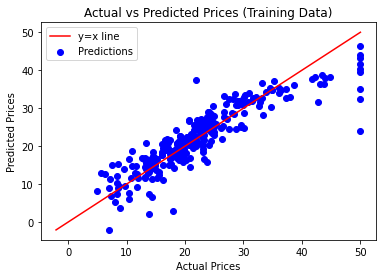

In [26]:
import matplotlib.pyplot as plt
plt.scatter(Y_train, Y_pred_train, color='blue', label='Predictions')
min_val = min(Y_train.min(), Y_pred_train.min())
max_val = max(Y_train.max(), Y_pred_train.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', label='y=x line')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices (Training Data)")
plt.legend()
plt.show()

In [27]:
from sklearn.metrics import r2_score
r2_score(Y_train, Y_pred_train)

0.7927657852108867

In [28]:
Y_pred_test = Linear_Regression.predict(X_test)

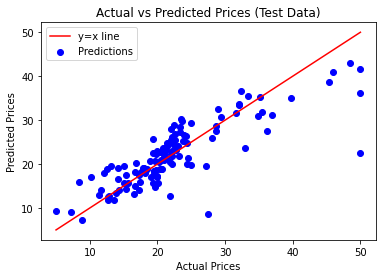

In [29]:
plt.scatter(Y_test, Y_pred_test, color='blue', label='Predictions')
min_val = min(Y_test.min(), Y_pred_test.min())
max_val = max(Y_test.max(), Y_pred_test.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', label='y=x line')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices (Test Data)")
plt.legend()
plt.show()

In [30]:
from sklearn.metrics import r2_score
r2_score(Y_test, Y_pred_test)

0.687341164461565

In [31]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(Y_test, Y_pred_test)
mae = mean_absolute_error(Y_test,Y_pred_test)
print("Mean Square Error : ", mse)
print("Mean Absolute Error : ", mae)

Mean Square Error :  23.8845226635934
Mean Absolute Error :  3.2710371885086036
